<center>
    <h1>Bar Plots, Histograms, and Distributions</h1>
</center>

<h2>1. Introduction</h2>
<br>
<div><p>In the "Scatter Plots and Correlation" lesson, we learned more about exploratory data visualization. We worked with time series data on bike sharing and learned about seasonality, scatter plots, and correlation.</p>
<p>In this lesson, we'll learn new things about exploratory data visualization. We'll continue using the bike sharing dataset:</p>
<table class="dataframe">
<thead>
<tr>
<th></th>
<th>instant</th>
<th>dteday</th>
<th>season</th>
<th>yr</th>
<th>mnth</th>
<th>holiday</th>
<th>weekday</th>
<th>workingday</th>
<th>weathersit</th>
<th>temp</th>
<th>atemp</th>
<th>hum</th>
<th>windspeed</th>
<th>casual</th>
<th>registered</th>
<th>cnt</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>2011-01-01</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>6</td>
<td>0</td>
<td>2</td>
<td>0.344167</td>
<td>0.363625</td>
<td>0.805833</td>
<td>0.160446</td>
<td>331</td>
<td>654</td>
<td>985</td>
</tr>
<tr>
<th>1</th>
<td>2</td>
<td>2011-01-02</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>0.363478</td>
<td>0.353739</td>
<td>0.696087</td>
<td>0.248539</td>
<td>131</td>
<td>670</td>
<td>801</td>
</tr>
<tr>
<th>2</th>
<td>3</td>
<td>2011-01-03</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>1</td>
<td>0.196364</td>
<td>0.189405</td>
<td>0.437273</td>
<td>0.248309</td>
<td>120</td>
<td>1229</td>
<td>1349</td>
</tr>
<tr>
<th>3</th>
<td>4</td>
<td>2011-01-04</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>2</td>
<td>1</td>
<td>1</td>
<td>0.200000</td>
<td>0.212122</td>
<td>0.590435</td>
<td>0.160296</td>
<td>108</td>
<td>1454</td>
<td>1562</td>
</tr>
<tr>
<th>4</th>
<td>5</td>
<td>2011-01-05</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>3</td>
<td>1</td>
<td>1</td>
<td>0.226957</td>
<td>0.229270</td>
<td>0.436957</td>
<td>0.186900</td>
<td>82</td>
<td>1518</td>
<td>1600</td>
</tr>
</tbody>
</table>
<p>Recall that the <code>workingday</code> column describes the type of day: a working day or a non-working day (weekend or holiday). A value of <code>1</code> represents a working day, and a value of <code>0</code> represents a non-working day.</p>
</div>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
bike_sharing = pd.read_csv('day.csv', parse_dates=['dteday'])
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

<div>
<p>The <code>workingday</code> column correlates negatively with the <code>casual</code> column and positively correlates with the <code>registered</code> column (recall that the <code>casual</code> and <code>registered</code> columns show us the number of bikes rented by casual and registered users each day).</p>
</div>

In [9]:
bike_sharing.corr().loc['workingday', ['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

<div>
<p>These values suggest that registered users tend to use the bikes more on working days — to commute to work probably. On the other side, casual users tend to rent the bikes more on the weekends and holidays — probably for some leisure time.</p>
<p>To corroborate or disprove these observations, we'll calculate the average number of rentals for casual and registered users on working and non-working days.</p>
<p>We'll calculate the averages on the next screen, but first, let's visualize the correlations.</p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>Generate a scatter plot with the <code>workingday</code> column on the x-axis and the <code>casual</code> column on the y-axis. Add <code>'Working Day Vs. Casual'</code> as a title.</li>
<li>Generate a scatter plot with the <code>workingday</code> column on the x-axis and the <code>registered</code> column on the y-axis. Add <code>'Working Day Vs. Registered'</code> as a title. You'll first need to close the previous scatter plot using <code>plt.show()</code></li>
<li>Do you notice an opposing pattern between the two scatter plots? The scatter plots might look a bit odd at first, but recall <code>workingday</code> only has two unique values, so you'll see two narrow vertical strips on the plots.</li>
</ol>

<h4>Dataframe Plot</h4>

[pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

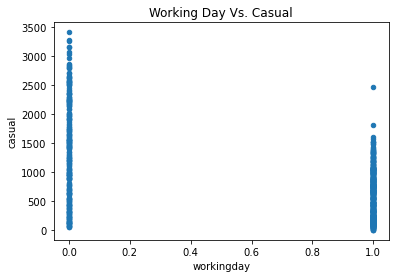

In [19]:
bike_sharing.plot(
    x='workingday',
    y='casual',
    title='Working Day Vs. Casual',
    kind='scatter')
plt.show()

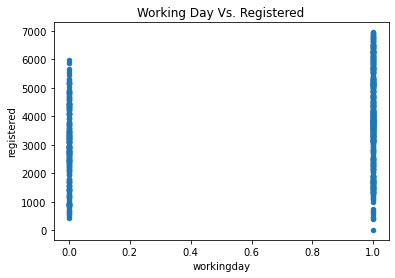

In [20]:
bike_sharing.plot(
    x='workingday', 
    y='registered', 
    title='Working Day Vs. Registered',
    kind='scatter',
)
plt.show()

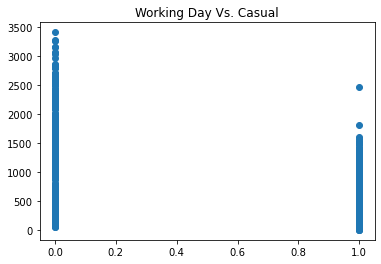

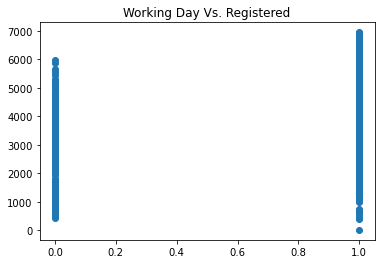

In [21]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title('Working Day Vs. Casual')
plt.show()

plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered')
plt.show()

<h2>2. Bar Plots</h2>
<br>
<div><p>We found a pattern that is potentially true: registered users tend to use the bikes more on the working days, while casual users tend to rent the bikes more on the weekends and holidays.</p>
<p>We corroborated this hypothesis with the average number of rentals we see for casual and registered users on working and non-working days:</p>
<table class="dataframe">
<thead>
<tr>
<th>workingday</th>
<th>casual</th>
<th>registered</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>1371.134199</td>
<td>2959.034632</td>
</tr>
<tr>
<td>1</td>
<td>606.570000</td>
<td>3978.250000</td>
</tr>
</tbody>
</table>
<p>On non-working days, casual users rent on average more than double the number of bikes they rent on working days: 1,371 bikes compared to 607 bikes.</p>
<p>Conversely, registered users rent significantly less during non-working days: 2,959 compared to 3,978 bikes.</p>
<p>This can be useful business information. For instance, the marketing team can come up with more targeted membership offers. They can experiment with an annual holiday-and-weekend subscription to see if this increases conversion rates among casual users.</p>
<p>To get a visual estimate of the data in our table above, we can use a <strong>bar plot</strong> (also called a bar chart).</p>
<p>For instance, this is how the bar plot for the casual users averages looks — we can generate a bar plot using the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html" target="_blank"><code>plt.bar()</code> function</a>:</p>
</div>

In [23]:
working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

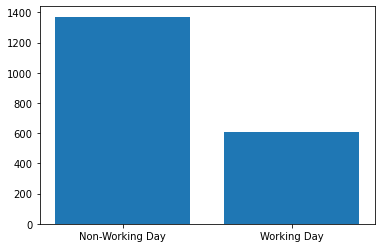

In [24]:
plt.bar(working_days, casual_avg)
plt.show()

<div>
<p>In our bar plot above, we see two vertical blue bars. The bar on the left corresponds to the non-working day category, and the one on the right to the working day category.</p>
<p>The bar on the left is higher — it's more than twice as tall as the one on the right. That's because on non-working days casual users rent on average more than double the number of bikes they rent on working days.</p>
<p>The height of each bar corresponds to the values in the <code>casual_avg</code> list — the left bar corresponds to the value 1,371, and the right one corresponds to 607. Essentially, the height is a y-coordinate.</p>
<p>We pass the heights of the bars as the second argument in <code>plt.bar(x, height)</code>. The first parameter, <code>x</code>, specifies the x-coordinates, and it works equally well with both numbers and strings (Matplotlib handles the strings behind the curtains). Below, we see an example with numbers:</p>
</div>

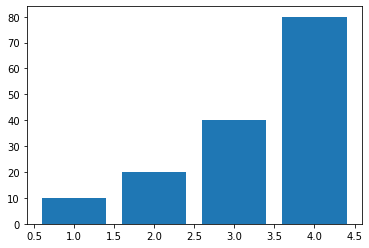

In [25]:
plt.bar(x=[1,2,3,4], height=[10,20,40,80])
plt.show()

<h3>Exercise</h3>
<br>

```python
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]
```
<div>
<ol>
<li>Generate a bar plot using the <code>plt.bar()</code> function:<ul>
<li>The <code>working_days</code> list provides the x-coordinates.</li>
<li>The <code>registered_avg</code> list provides the heights.</li>
</ul>
</li>
<li>Display the plot using <code>plt.show()</code>.</li>
</ol></div>

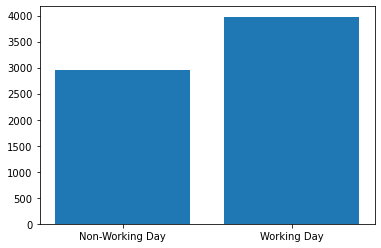

In [26]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.show()

<h2>3. Customizing Bar Plots</h2>
<br>
We saw that the data indicates that registered users tend to use the bikes more on working days, while casual users tend to rent the bikes more on weekends and holidays.</p>
<p>We can also take a more granular approach to analyzing the data and examine the average number of rentals for casual and registered users based on the day of the week (Monday, Tuesday, Wednesday, etc.).</p>
<p>The <code>weekday</code> column in our dataset describes the day of the week (<code>0</code> is Sunday, and <code>6</code> is Saturday):</p>
</div>

In [27]:
bike_sharing['weekday'].value_counts().sort_index()
# We use Series.sort_index() to sort the index in an ascending order

0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: weekday, dtype: int64

In [28]:
# It's not essential to understand how this code works, we'll cover this in a later moment
weekday_averages = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index() 

In [30]:
weekday_averages

,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077
5,5,752.288462,3938.000000
6,6,1465.257143,3085.285714


<div>
<p>Based on the <code>weekday</code> column, we already calculated the averages behind the curtains and added them to the table below:</p>
<table class="dataframe">
<thead>
<tr>
<th>weekday</th>
<th>casual</th>
<th>registered</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>1338.295238</td>
<td>2890.533333</td>
</tr>
<tr>
<td>1</td>
<td>674.133333</td>
<td>3663.990476</td>
</tr>
<tr>
<td>2</td>
<td>556.182692</td>
<td>3954.480769</td>
</tr>
<tr>
<td>3</td>
<td>551.144231</td>
<td>3997.394231</td>
</tr>
<tr>
<td>4</td>
<td>590.961538</td>
<td>4076.298077</td>
</tr>
<tr>
<td>5</td>
<td>752.288462</td>
<td>3938.000000</td>
</tr>
<tr>
<td>6</td>
<td>1465.257143</td>
<td>3085.285714</td>
</tr>
</tbody>
</table>
<p>Notice that we now have seven rows in the table, and it's a bit harder to compare all the values. We can use a bar plot to help us get a visual estimate of the differences instead of going over values one-by-one and performing mental subtractions.</p>
<p>Below, we generate a bar plot for the <code>casual</code> column in our table above. In the code below, assume the <code>weekday_averages</code> variable is a <code>DataFrame</code> storing the table above:</p>
</div>

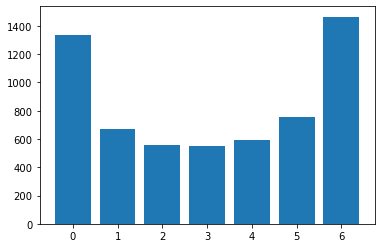

In [31]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.show()

<div>
<p>The first bar (Sunday) and the last one (Saturday) are more than twice as tall as all the other bars. This shows that casual users rent more bikes on the weekends, which corroborates our initial findings.</p>
<p>If we look at the x-tick labels, we only see numbers (from 0 to 6). If we wanted to add day names instead, we can use the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html" target="_blank"><code>plt.xticks()</code> function</a>. The <code>ticks</code> parameter takes in the x-coordinates, and the <code>labels</code> parameter takes in the corresponding new labels:</p>
</div>

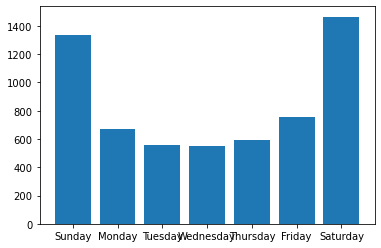

In [32]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

<div>
<p>Some of the x-tick labels are now overlapping. One thing we can do is leverage the <code>rotation</code> parameter we learned about in the first lesson:</p>
</div>

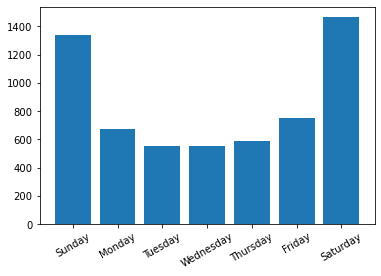

In [33]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()


<p>Another solution is to flip all the bars horizontally.</p>
    

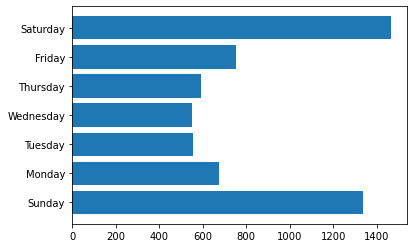

In [34]:
plt.barh(weekday_averages['weekday'], weekday_averages['casual'])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

<p>We call this a <strong>horizontal bar plot</strong>. The average numbers of bikes rented are now on the x-axis, and the day names are on the y-axis. And we're now talking about bar widths instead of bar heights. </p>
<p>To generate the bar plot above, we can use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html" target="_blank"><code>plt.barh(y, width)</code> function</a> along with the <code>plt.yticks()</code> function to change the y-tick labels:</p>

<h3>Excercise</h3>
<br>
<div ><p>We've already saved the table above into the <code>weekday_averages</code> variable, which is a <code>DataFrame</code> (you can see the code we used in the code editor).</p>
<ol>
<li>
<p>Generate a bar plot using the <code>weekday_averages</code> variable:</p>
<ul>
<li>The <code>weekday</code> column provides the x-coordinates.</li>
<li>The <code>registered</code> column provides the heights.</li>
</ul>
</li>
<li>
<p>Change the x-tick labels using the <code>plt.xticks()</code> function.</p>
<ul>
<li>The new labels should be <code>['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']</code>.</li>
<li>The x-coordinates of the labels are <code>[0, 1, 2, 3, 4, 5, 6]</code>.</li>
<li>All labels are rotated to an angle of <code>30</code> degrees.</li>
</ul>
</li>
<li>
<p>Analyze the bar plot in light of our initial observations — does the results support the idea that registered users rent more bikes on working days?</p>
</li>
</ol></div>

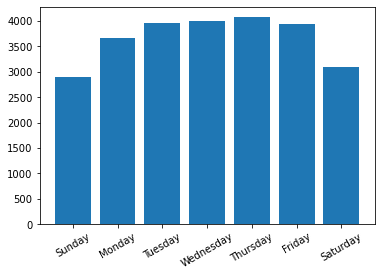

In [37]:
plt.bar(weekday_averages['weekday'], 
        weekday_averages['registered'],        
       )

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels='Sunday Monday Tuesday Wednesday Thursday Friday Saturday'.split(),
           rotation=30,
          )

plt.show()

<h2>4. Frequency Tables</h2>
<br>
<div><p>Our dataset describes bike sharing activity for the Capital Bikeshare company in Washington, D.C. Let's say the company has decided to open up a new bike sharing system in another American city.</p>
<p>Weather patterns are going to play an important part in choosing the next location. We're asked to pull up some weather data about Washington, D.C. — the decision-making team wants to use that as a benchmark for evaluating other cities.</p>
<p>One useful column is <code>weathersit</code>, which describes the daily weather type. Let's look at the unique values and the number of times each occurs:</p>
</div>

In [41]:
bike_sharing['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

<div>
<p>We only see three unique values above, but, according to the documentation, the <code>weathersit</code> column has four unique values (<code>4</code> has a frequency of zero as a consequence):</p>
<ul>
<li><code>1</code>: clear or few clouds</li>
<li><code>2</code>: mist or cloudy</li>
<li><code>3</code>: light rain, light snow, thunderstorm</li>
<li><code>4</code>: heavy rain, snow, ice pellets, fog</li>
</ul>
<p>The output of <code>bike_sharing['weathersit'].value_counts()</code> lists all the unique values along with the number of times each unique value occurs.</p>
<p>We call the number of times that a unique value occurs the <strong>frequency</strong>. And we call the output of <code>bike_sharing['weathersit'].value_counts()</code> a <strong>frequency table</strong>.</p>
<p>More generally, the <code>Series.value_counts()</code> method returns a frequency table. The best way to visualize a frequency table is by using a bar plot.</p>
</div>

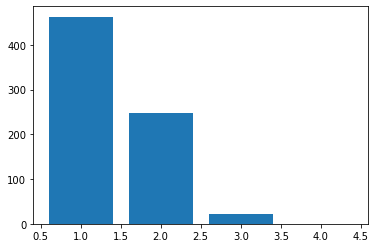

In [42]:
weather_types = [1, 2, 3, 4]
frequencies = [463, 247, 21, 0]
plt.bar(weather_types, frequencies)
plt.show()

<div>
<p>Bar plots work especially well for visualizing frequency tables when the number of unique values is low.</p>
<p>If there are many unique values, then the bar plot looks too crowded, and it becomes more difficult to see any pattern.</p>
<p>Bar plots work well when generating the frequency tables for categorical columns. For numerical columns, we need to use a histogram — a graph type that we'll learn about later in this lesson.</p>
<p>For our next exercise, we're going to visualize weather patterns in Washington, D.C. for 2011 and 2012 individually. This will help us see if the weather is consistent from year to year. In the code editor, you can already see the following defined:</p>
<ul>
<li>The list <code>unique_values</code>: all the unique values of the <code>weathersit</code> column.</li>
<li>The list <code>weather_2011</code>: the frequency of each unique value for the year 2011 only — for instance, the unique value <code>1</code> occurred <code>226</code> times in 2011, <code>2</code> occurred <code>124</code> times, and so on.</li>
<li>The list <code>weather_2012</code>: the frequency of each unique value for the year 2012 only.</li>
</ul>
<p>We've already generated the bar plot for 2011, and now we're going to build the other one.</p></div>

<h3>Exercise</h3>
<br>
<div><ol>
<li>
<p>Generate a bar plot to display the weather patterns in 2012.</p>
<ul>
<li>Use the <code>unique_values</code> list for x-coordinates, and the <code>weather_2012</code> list as bar heights.</li>
<li>Use <code>plt.xticks()</code> to customize the x-ticks: the only tick labels displayed should be 1, 2, 3, and 4.</li>
<li>Use <code>'Weather Patterns: 2012'</code> as a title.</li>
<li>Use <code>'Frequency'</code> as an y-label.</li>
<li>Use <code>'Unique Values'</code> as an x-label.</li>
<li>Close the bar plot using <code>plt.show()</code>.</li>
</ul>
</li>
<li>
<p>Inspect both bar plots — does the weather in Washington D.C. show consistent patterns for 2011 and 2012?</p>
</li>
</ol></div>

In [38]:
unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

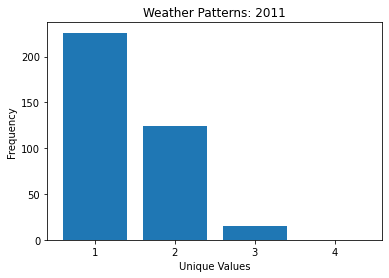

In [39]:
# DON'T DELETE
plt.bar(unique_values, weather_2011)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

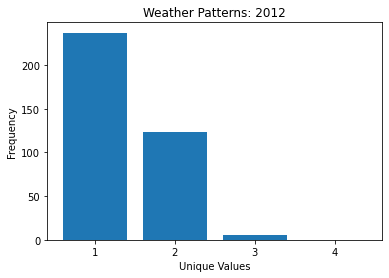

In [40]:
plt.bar(unique_values, weather_2012)
plt.xticks(ticks=unique_values)
plt.title('Weather Patterns: 2012')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

<h2>5. Grouped Frequency Tables</h2>
<br>
<div><p>On the previous cell, we generated a frequency table for the <code>weathersit</code> column.</p>
</div>
    

In [44]:
bike_sharing['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

<div>
<p>The table is fairly straightforward to read and interpret. For most days (463 days), the sky is clear or has a few clouds. However, there are also days (247 days) where we see mist or the sky is cloudy.</p>
<p>Quite rarely (21 days in two years), we have light rains, light snows, or thunderstorms. Also, heavy rains or snows are extremely rare in Washington, D.C. (no occurrences in 2011 and 2012).</p>
<p>However, if we generate a frequency table for the <code>cnt</code> column (which describes the total number of bike rentals), it's almost impossible to distinguish any pattern. And that's because <code>cnt</code> has 696 unique values (below, we see a truncated table).</p>
</div>

In [45]:
bike_sharing['cnt'].value_counts()

5119    2
5698    2
6536    2
5202    2
1977    2
       ..
4456    1
4458    1
4460    1
8173    1
5905    1
Name: cnt, Length: 696, dtype: int64

<div>
<p>To solve this problem, we can group the unique values into equal intervals. Below, we group the table into ten equal intervals by using the <code>bins=10</code> argument inside the <code>Series.value_counts()</code> method:</p>
</div>

In [46]:
bike_sharing['cnt'].value_counts(bins=10)

(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64

<div>
<p>The unique values are now number intervals. <code>(4368.0, 5237.2]</code> is a number interval. The <code>(</code> character indicates that the starting number is not included, while the <code>]</code> indicates that the ending number is included. The interval <code>(4368.0, 5237.2]</code> contains all numbers greater than 4368.0 and less than or equal to 5237.2.</p>
<p>We can better understand the structure of the table above if we sort the intervals in ascending order. </p>
</div>

In [47]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

<div>
<p>With a quick look at the table, we can make a few observations:</p>
<p></p><center><img src="gr_freq.svg" alt="img"></center><p></p>
<p>As a side note, the number of intervals in a grouped frequency table can vary — we can have 5, 6, 7, 10, 15, etc. Generally, 10 intervals is a good choice because it offers a good balance between information and comprehension. We'll learn more about this topic later in the statistics courses.</p>
<p>For our next exercise, we're going to generate grouped frequency tables for the <code>registered</code> and <code>casual</code> columns. On the next screen, we'll learn a new kind of graph that we can use to visualize grouped frequency tables.</p></div>

<h3>Exercise</h3>
<br>
<div><ol>
<li>
<p>Generate a grouped frequency table for the <code>registered</code> column.</p>
<ul>
<li>The table must have 10 intervals.</li>
<li>The intervals must be sorted in ascending order.</li>
<li>Assign the table to the <code>registered_freq</code> variable.</li>
</ul>
</li>
<li>
<p>Generate a grouped frequency table for the <code>casual</code> column.</p>
<ul>
<li>The table must have 10 intervals.</li>
<li>The intervals must be sorted in an ascending order.</li>
<li>Assign the table to the <code>casual_freq</code> variable.</li>
</ul>
</li>
</ol></div>

In [48]:
registered_freq = bike_sharing['registered'].value_counts(bins=10).sort_index()
registered_freq

(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: registered, dtype: int64

In [49]:
casual_freq = bike_sharing['casual'].value_counts(bins=10).sort_index()
casual_freq

(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: casual, dtype: int64

<h2>6. Hisotgrams</h2>
<br>
<div><p>We generated a grouped frequency table for the <code>cnt</code> column:</p>
</div>

In [50]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

<div>
<p>The best way to visualize a grouped frequency table is by using a <strong>histogram</strong>. To generate a histogram for our table above, we can use the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank"><code>plt.hist()</code> function</a>:</p>
</div>

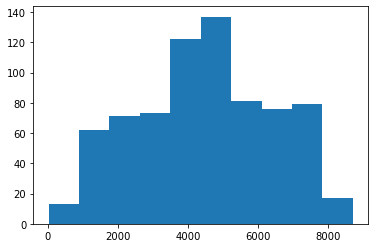

In [52]:
plt.hist(bike_sharing['cnt'])
plt.show()

<div>
<p>Notice that all we needed to pass to <code>plt.hist()</code> was the <code>cnt</code> column (not the grouped frequency table).</p>
<p>Behind the curtains, the <code>plt.hist()</code> function did the following:</p>
<ul>
<li>Generated a grouped frequency table with ten equal intervals for the <code>cnt</code> column.</li>
<li>Plotted a bar for each interval (ten intervals means ten bars). The height of each bar corresponds to the frequency of its corresponding interval.</li>
</ul>
<p>A histogram is a modified bar plot — the main visual difference is that there are no gaps between bars.</p>
<p>Another equally-important difference is that each bar represents an interval, not a single value.</p>
<p>Looking at the histogram we generated for the <code>cnt</code> column, we can make a few quick observations about the following:</p>
<ul>
<li>Range: Over the two years (2011 and 2012), the values ranged between 0 and 9,000 bike rentals.</li>
<li>The distribution of the bike rentals:<ul>
<li>Most typically, the number of bike rentals per day varies between 4,500 and 5,000 — the tallest bar is around that interval. The height of that bar indicates that we had about 140 days when rentals were between 4,500 and 5,000.</li>
<li>For most days, the number of rentals ranges between 1,000 and 7,500 — we see the tallest bars around this larger interval.</li>
<li>Most uncommonly, the number of rentals per day goes under 1,000 or over 8,000 — the bars are short around these values, with a frequency of 20 or less.</li>
</ul>
</li>
</ul>
<p>Histograms are one of the most common graphs we use in exploratory data visualization. They quickly show us the distribution of the values, which in turn can suggest important patterns — we'll continue this discussion on the next screen.</p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>Generate a histogram for the <code>casual</code> column.</li>
<li>Try to make a few quick observations about the histogram.<ul>
<li>What's the approximate range?</li>
<li>What's the interval with the greatest frequency?</li>
<li>What's the interval with the lowest frequency?</li>
</ul>
</li>
<li>Compare the shape of the <code>casual</code> histogram with the shape of the histogram we generated for the <code>cnt</code> column. What differences do you notice?</li>
</ol>

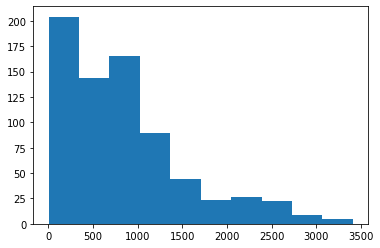

In [53]:
plt.hist(bike_sharing['casual'])
plt.show()

<h2>7. Normal Distribution</h2>
<br>
<div><p>On the previous screen, we started by generating a histogram for the <code>cnt</code> column. Then, we plotted a histogram for the <code>casual</code> column in the exercise. Notice that the two histograms have different shapes:</p>
<p></p><center>
<img src="m3_screen7_1.png" alt="img">
</center><p></p>
<p>It's useful to examine the shape of a histogram because it shows us the distribution of the values.</p>
<p>We often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide the histogram in two halves that are mirror images of one another.</p>
<p></p><center>
<img src="s1m4_symmetry.svg" alt="img">
</center><p></p>
<p>A histogram shows the distribution of the values, and if its shape is symmetrical, then we say we have a <strong>symmetrical distribution</strong>.</p>
<p>One common symmetrical distribution is the <strong>normal distribution</strong> (also called Gaussian distribution).</p>
<p></p><center>
<img src="s1m4_normal.svg" alt="img">
</center><p></p>
<p>Let's think of a numerical column for a moment (like the <code>cnt</code> column): it has a minimum value, a maximum value, and a range (the range is the difference between the maximum and the minimum column). If we plot a histogram for this column and the visual result is a normal distribution, then this means the following:</p>
<ul>
<li>Most of the values in that column lie in the middle of the range.</li>
<li>As we approach the minimum and the maximum points of the range, we have less and less of those values.</li>
</ul>
<p>To better understand what a normal distribution means, let's say we plotted a histogram with the grades students earned on a math test. If the histogram shows a normal distribution, then this means the following:</p>
<ul>
<li>Most of the student performances were average (lying somewhere in the middle between the minimum and the maximum marks).</li>
<li>As we approach the minimum and maximum marks, we have less and less students with those performances.</li>
</ul>
<p>Let's do a quick exercise to check our understanding and continue the discussion on the next screen.</p></div>

<h3>Exercise</h3>
<br>
<div ><p>The histogram below shows the distribution of the <code>registered</code> column.</p>
<p></p><center>
<img src="m3_screen7_2.png" alt="img">
</center><p></p>
<p>Based on the histogram above, evaluate the truth value of the following sentences.</p>
<ol>
<li>The distribution of the <code>registered</code> column looks similar to a normal distribution. Assign the Boolean <code>True</code> or <code>False</code> to <code>sentence_1</code>.</li>
<li>Most days, registered users rent between 6,000 and 7,000 bikes. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.</li>
<li>It's relatively rare that registered users rent fewer than 500 bikes in one day. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.</li>
<li>The tallest bar on the histogram corresponds to a frequency of about 140 days. Assign <code>True</code> or <code>False</code> to <code>sentence_4</code>.</li>
<li>The histogram above has a total of 12 bars. Assign <code>True</code> or <code>False</code> to <code>sentence_5</code>.</li>
</ol></div>

In [54]:
sentence_1 = True
sentence_2 = False
sentence_3 = True
sentence_4 = True
sentence_5 = False

<h2>8. The Uniform Distribution</h2>
<br>
<div><p>On the previous screen, we introduced the normal distribution as an example of a symmetrical distribution.</p>
<p>Another symmetrical distribution we can see in practice is the <strong>uniform distribution</strong> — the values are <em>uniformly distributed</em>. The bars have equal height because the intervals have equal frequencies.</p>
<p></p><center>
<img src="s1m4_uniform.svg" alt="img">
</center><p></p>
<p>If we plotted a histogram for the grades students earned on a math test, and the distribution is uniform, this means that all the marks (or the mark intervals) have the same frequency.</p>
<p>When we plot histograms in practice, we rarely see perfectly symmetrical distributions. However, these ideal cases we learned about serve as a baseline to help us describe and interpret the distributions we see in practice.</p>
<p>For instance, if we look at the histograms for the <code>cnt</code> and the <code>registered</code> columns, we can say they look similar to a normal distribution. This immediately tells us that most values lie in the middle, and the frequencies gradually decrease toward the extremities.</p>
<p></p><center>
<img src="m3_screen8_1.png" alt="img">
</center><p></p>
<p>Let's do a quick exercise and resume the discussion on the next screen, where we learn that not all histograms have symmetrical shapes.</p></div>

<h3>Exercise</h3>
<br/>
<div id="body" class="dq-lesson-container dq-lesson-markup dq-lesson-learn-instructions"><p>Below, we see two histograms plotted for the <code>cnt</code> and the <code>casual</code> columns.</p>
<p></p><center>
<img src="m3_screen7_1.png" alt="img">
</center><p></p>
<p>Based on the histograms above, evaluate the truth value of the following sentences.</p>
<ol>
<li>The <code>casual</code> distribution is not symmetrical. Assign the Boolean <code>True</code> or <code>False</code> to <code>sentence_1</code>.</li>
<li>Most days, casual users rent over 2,000 bikes. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.</li>
<li>The <code>cnt</code> distribution is approximately symmetrical, and it looks more like a uniform distribution than a normal distribution. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.</li>
<li>The tallest bar on the <code>cnt</code> histogram corresponds to about 200 days. Assign <code>True</code> or <code>False</code> to <code>sentence_4</code>.</li>
</ol></div>

In [55]:
sentence_1 = True
sentence_2 = False
sentence_3 = False
sentence_4 = False

<h2>9. Skewed Distributions</h2>
<br/>
<div><p>On the previous two screens, we learned about symmetrical distributions. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide it into two halves that are mirror images of one another.</p>
<p></p><center>
<img src="s1m4_symmetry.svg" alt="img">
</center><p></p>
<p>Not all histogram shapes are symmetrical though. The histogram of the <code>casual</code> column, for instance, shows a cluster of tall bars located on the left side of the x-axis.</p>
<p></p><center>
<img src="m3_screen9_0.png" alt="img">
</center><p></p>
<p>The <code>casual</code> histogram shows a <strong>skewed distribution</strong>. In a skewed distribution, we see the following:</p>
<ul>
<li>The values pile up toward the end or the starting point of the range, making up the <em>body</em> of the distribution.<ul>
<li>In the case of the <code>casual</code> histogram, the values pile up toward the starting point of the range.</li>
</ul>
</li>
<li>Then the values decrease in frequency towards the opposite end, forming the <em>tail</em> of the distribution.</li>
</ul>
<p></p><center>
<img src="s1m4_body_tail.svg" alt="img">
</center><p></p>
<p>If the tail points to the right, then the distribution is right skewed (the distribution of the <code>casual</code> column is right skewed). If the tail points to the left, then the distribution is said to be left skewed.</p>
<p></p><center>
<img src="m3_0.png" alt="img">
</center><p></p>
<p>When the tail points to the left, it also points in the direction of negative numbers (on the x-axis, the numbers decrease from right to left). For this reason, a left-skewed distribution is sometimes also said to have a negative skew.</p>
<p>When the tail points to the right, it also points in the direction of positive numbers. As a consequence, right-skewed distributions are also said to have a positive skew.</p>
<p></div>